# IMPORTS

In [ ]:
!pip install -qq transformers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.6 MB/s eta 0:00:00


In [ ]:
# General Imports
from PIL import Image
import requests
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd

# Hugging face Transformers library specific imports
import torch
import transformers

# Tensorflow Keras library specific imports
from tensorflow.keras.datasets import cifar100
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
device

device(type='cuda')

# TRANSFER LEARNING FOR PRE TRAINED CNNS


In [ ]:
# Load CIFAR-100 data
(X_train, y_train), (X_test, y_test) = cifar100.load_data()

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

169001437/169001437 [==============================] - 4s 0us/step
(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
cifar100_classes = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger",
    "tractor", "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]
cifar100_dict = {i: cifar100_classes[i] for i in range(len(cifar100_classes))}

print(cifar100_dict)


{0: 'apple', 1: 'aquarium_fish', 2: 'baby', 3: 'bear', 4: 'beaver', 5: 'bed', 6: 'bee', 7: 'beetle', 8: 'bicycle', 9: 'bottle', 10: 'bowl', 11: 'boy', 12: 'bridge', 13: 'bus', 14: 'butterfly', 15: 'camel', 16: 'can', 17: 'castle', 18: 'caterpillar', 19: 'cattle', 20: 'chair', 21: 'chimpanzee', 22: 'clock', 23: 'cloud', 24: 'cockroach', 25: 'couch', 26: 'crab', 27: 'crocodile', 28: 'cup', 29: 'dinosaur', 30: 'dolphin', 31: 'elephant', 32: 'flatfish', 33: 'forest', 34: 'fox', 35: 'girl', 36: 'hamster', 37: 'house', 38: 'kangaroo', 39: 'keyboard', 40: 'lamp', 41: 'lawn_mower', 42: 'leopard', 43: 'lion', 44: 'lizard', 45: 'lobster', 46: 'man', 47: 'maple_tree', 48: 'motorcycle', 49: 'mountain', 50: 'mouse', 51: 'mushroom', 52: 'oak_tree', 53: 'orange', 54: 'orchid', 55: 'otter', 56: 'palm_tree', 57: 'pear', 58: 'pickup_truck', 59: 'pine_tree', 60: 'plain', 61: 'plate', 62: 'poppy', 63: 'porcupine', 64: 'possum', 65: 'rabbit', 66: 'raccoon', 67: 'ray', 68: 'road', 69: 'rocket', 70: 'rose', 

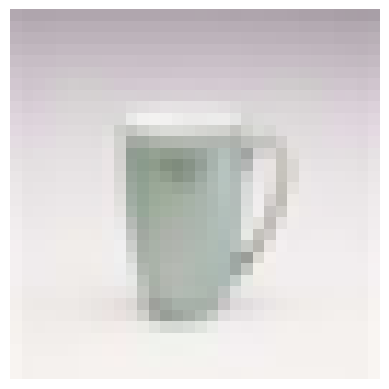

[28]
cup


In [ ]:
idx = 7

plt.imshow(X_train[idx])
plt.axis('off')
plt.show()

print(y_train[idx])
print(cifar100_classes[y_train[idx][0]])

In [ ]:
# Preprocess data
X_train_resized = X_train.astype('float32') / 255.0
X_test_resized = X_test.astype('float32') / 255.0

y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

In [ ]:


base_model=keras.applications.DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(32, 32, 3)
)

29084464/29084464 [==============================] - 0s 0us/step


In [ ]:
# Create a Sequential model
model = Sequential()

# Add Xception base model
model.add(base_model)

# Add custom dense layers on top
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

In [ ]:
from keras.callbacks import EarlyStopping

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=33, batch_size=128, validation_data=(X_test, y_test), callbacks=[early_stopping])


Epoch 1/33
404/404 [==============================] - 116s 103ms/step - loss: 4.2479 - accuracy: 0.0932 - val_loss: 3.3599 - val_accuracy: 0.2678
Epoch 2/33
404/404 [==============================] - 36s 88ms/step - loss: 2.9967 - accuracy: 0.2918 - val_loss: 2.2763 - val_accuracy: 0.4329
Epoch 3/33
404/404 [==============================] - 33s 82ms/step - loss: 2.2585 - accuracy: 0.4354 - val_loss: 1.9847 - val_accuracy: 0.4936
Epoch 4/33
404/404 [==============================] - 33s 83ms/step - loss: 1.8008 - accuracy: 0.5317 - val_loss: 1.7371 - val_accuracy: 0.5387
Epoch 5/33
404/404 [==============================] - 34s 85ms/step - loss: 1.4686 - accuracy: 0.6079 - val_loss: 1.6908 - val_accuracy: 0.5571
Epoch 6/33
404/404 [==============================] - 34s 84ms/step - loss: 1.1992 - accuracy: 0.6744 - val_loss: 1.6190 - val_accuracy: 0.5763
Epoch 7/33
404/404 [==============================] - 33s 83ms/step - loss: 0.9658 - accuracy: 0.7322 - val_loss: 1.6314 - val_accurac

In [ ]:
# Evaluate the model
score = model.evaluate(X_test, y_test)

print(score)

313/313 [==============================] - 6s 16ms/step - loss: 1.7444 - accuracy: 0.5891
[1.7444154024124146, 0.5891000032424927]


In [ ]:
print(f'Test Loss: {score[0]:.4f}, Test Accuracy: {score[1]:.4f}')

Test Loss: 1.7444, Test Accuracy: 0.5891


In [ ]:
# Generate predictions
y_pred = model.predict(X_test)

idx = 17

print(y_pred[idx])
print(y_test[idx])

313/313 [==============================] - 10s 27ms/step
[3.85817748e-06 1.20942095e-04 4.77142639e-05 1.99099164e-03
 1.62013275e-05 2.00085560e-06 1.30340399e-04 7.67379752e-05
 7.72686981e-05 6.20556148e-06 1.51897229e-05 8.56636761e-05
 2.83980512e-06 5.44697605e-06 1.55861926e-05 9.68069769e-04
 5.18515390e-06 2.33546552e-06 4.22293624e-06 2.71864992e-04
 3.62899095e-06 3.47177338e-05 3.92498805e-05 2.85215301e-05
 3.54323879e-06 6.46429107e-05 6.23623127e-05 2.72224679e-05
 1.51566521e-04 1.90314153e-04 2.56678095e-06 1.95908415e-05
 1.06267064e-04 1.18665575e-05 1.01704313e-03 7.64669530e-05
 3.97512922e-04 1.02058902e-06 2.93718930e-03 8.35358605e-06
 4.15863133e-06 7.52670394e-06 1.09804841e-03 7.39650102e-04
 9.74302930e-06 4.47840939e-05 1.14939357e-04 4.48844230e-06
 1.49459311e-05 2.12041577e-05 1.27198559e-03 8.40018984e-05
 3.13364080e-06 2.51341203e-06 3.29105205e-05 6.51537630e-05
 7.34927789e-06 2.23840943e-05 3.83490487e-06 5.21018637e-06
 4.45872320e-06 3.67270331e-

In [ ]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

print(y_pred_classes[idx])
print(y_true_classes[idx])

97
97


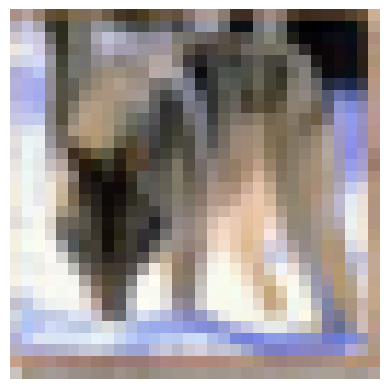

In [ ]:
plt.imshow(X_test[idx])
plt.axis('off')
plt.show()

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_true_classes, y_pred_classes)
cm

array([[82,  0,  1, ...,  0,  0,  0],
       [ 0, 66,  1, ...,  0,  0,  0],
       [ 0,  0, 55, ...,  0,  3,  0],
       ...,
       [ 0,  0,  0, ..., 66,  0,  0],
       [ 0,  2,  6, ...,  0, 37,  0],
       [ 0,  1,  0, ...,  0,  0, 66]])

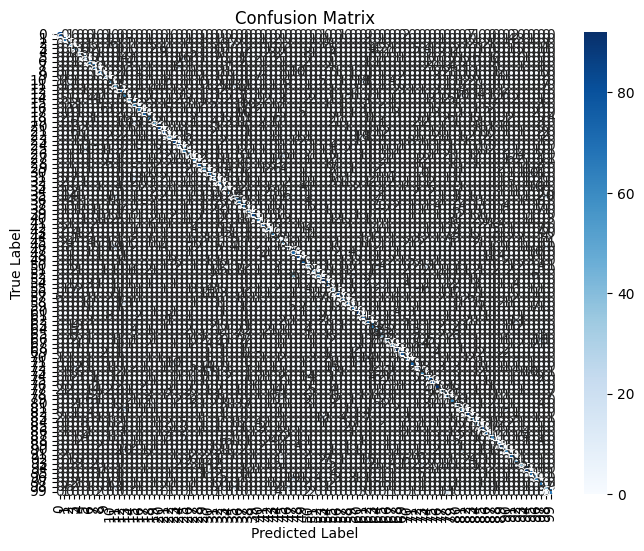

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(100), yticklabels=range(100))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Classification Report
print(classification_report(y_true=y_true_classes, y_pred=y_pred_classes, target_names=cifar100_dict.values()))

               precision    recall  f1-score   support

        apple       0.87      0.82      0.85       100
aquarium_fish       0.67      0.66      0.67       100
         baby       0.44      0.55      0.49       100
         bear       0.34      0.45      0.39       100
       beaver       0.46      0.26      0.33       100
          bed       0.62      0.54      0.58       100
          bee       0.56      0.62      0.59       100
       beetle       0.61      0.66      0.63       100
      bicycle       0.79      0.68      0.73       100
       bottle       0.80      0.64      0.71       100
         bowl       0.56      0.45      0.50       100
          boy       0.41      0.43      0.42       100
       bridge       0.56      0.67      0.61       100
          bus       0.45      0.55      0.50       100
    butterfly       0.62      0.37      0.46       100
        camel       0.43      0.57      0.49       100
          can       0.64      0.61      0.63       100
       ca